In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
## --- 설정 변수 정의 ---
## 이미지 경로 설정
# 입력 이미지 경로 (npy 파일) 
img_path_list = "/src/hyebin/deeplab_v3/train_data_256.npy"

## 스텝 사이즈, 잘라낼 크기 설정
# 가로축 이동 거리
step_x = 20
# 세로축 이동 거리
step_y = 20
# 가로 범위
width = 50
# 세로 범위
height = 50

In [3]:
## --- 이미지 출력 함수 ---
def show_image(division_image_list, range_w, range_h):
    
    range_w = range_w-2
    range_h = range_h-2
    print('range_w : {}'.format(range_w))
    print('range_h : {}'.format(range_h))
    
    # pyplot의 현재 전체 이미지 크기를 백업 후 설정함
    tmp_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = (20,20)  # 너비, 높이 (in)
    
    range_idx = range_h * range_w
    print('range_idx : {}'.format(range_idx))
    
    for show_idx in range(range_idx):
        
        plt.subplot(range_h, range_w, show_idx+1)
        plt.imshow(division_image_list[show_idx], cmap='gray')
        plt.axis('off')

    plt.show()
    plt.close()
    
    # 백업된 pyplot 이미지 크기를 복원함
    plt.rcParams["figure.figsize"] = tmp_size

In [8]:
## --- 이미지 분할 및 저장 함수 ---
def division_image(img, step_x, step_y, width, height, img_w, img_h):
 
    range_w = round(img_w/step_x)
    range_h = round(img_h/step_y)
    print('range_w : {},  range_h : {}'.format(range_w, range_h))
    
    #i = 0
    division_list = []
    for h in range(range_h):  # height
        for w in range(range_w):  # weight
            # 가로 시작점(좌), 세로 시작점(상), 가로 범위(우), 세로 범위(하)
            left = w*step_x
            top = h*step_y
            right = (w*step_x)+width
            bottom = (h*step_y)+height
            
            # if left-right, top-bottom이 각각 img_w, img_h를 넘지 않을때만 crop을 실행한다
            if (left and right < img_w) and (top and bottom < img_h):
            
                # crop
                division_image = img[top:bottom, left:right]
            
                #i += 1
                division_list.append(division_image)
    
    print('division_list : {}'.format(len(division_list)))
                
    return division_list, w, h

In [5]:
## --- numpy 이미지 배열 가져오기 ---
img_list = np.load(img_path_list, allow_pickle=True)
img_list= np.squeeze(img_list, axis=3)  # (537,256,256,1) → (537,256,256)
print(img_list.shape)
print(img_list.shape[1])
print(img_list.shape[2])

(537, 256, 256)
256
256


In [6]:
## --- 가져온 이미지 배열을 리스트에 담기 ---
start = 102  # 시작 이미지
num = 1      # 출력 개수
_img = []

for i in range(num):
    _img.append(img_list[start+i])

range_w : 13,  range_h : 13
division_list : 100
range_w : 10
range_h : 10
range_idx : 100


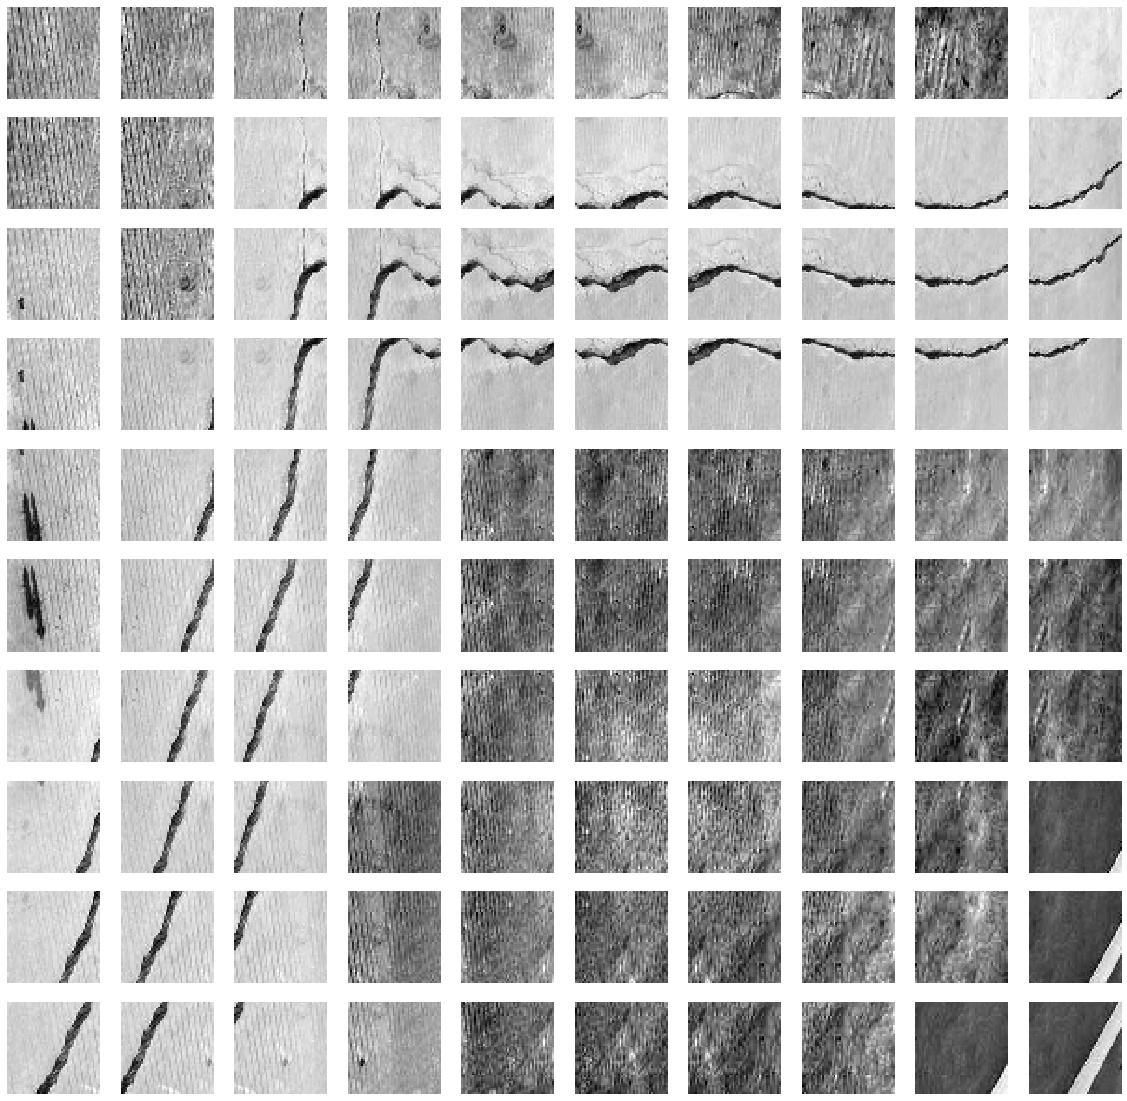

In [9]:
## --- 실행 ---
for i in range(len(_img)):
    # [y:h, x:w]
    # [높이(행), 너비(열)]
    # [세로 시작점:세로 범위, 가로 시작점:가로 범위]
    division_img, range_w, range_h = division_image(_img[i], step_x, step_y, width, height, img_list.shape[1], img_list.shape[2])
    show_image(division_img, range_w, range_h)